In [1]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [2]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 88B8-561F

 Directory of C:\Users\dsilva2\EMAT22110_FA21

12/07/2021  04:10 PM    <DIR>          .
12/07/2021  04:10 PM    <DIR>          ..
12/07/2021  03:42 PM    <DIR>          .ipynb_checkpoints
11/04/2021  11:16 AM             1,077 2016news-topic-ranks.csv
09/02/2021  03:32 PM             5,319 Aug31_inclass-practice.ipynb
09/30/2021  03:41 PM             1,623 bls_data.csv
09/14/2021  03:27 PM            20,354 chess_buds_messages.csv
11/04/2021  02:44 PM            51,051 chi2-crosstabs.ipynb
10/19/2021  12:17 PM            58,901 COVID-Raffle-data-collection.ipynb
09/21/2021  03:30 PM           313,653 DataFrame-Methods-and-visuals.ipynb
10/28/2021  04:07 PM           118,748 datetime-and-figure-axis.ipynb
12/02/2021  05:00 PM           119,686 Dec-2_in-class_text-cleaning.ipynb
12/02/2021  03:03 PM            54,203 Dec-2_prep_text-analysis.ipynb
12/07/2021  04:10 PM            22,016 Dec-3_in-class_vaderSentiment.ipynb
0

In [3]:
oly = pd.read_csv('Olympics_Postponed_Twitter_Unique.csv', encoding = 'utf-8')

In [4]:
oly.keys()

Index(['Date', 'Title', 'Url', 'Language', 'Author', 'Avatar',
       'Category Details', 'Checked', 'City', 'Display URLs', 'Expanded URLs',
       'Full Name', 'Full Text', 'Gender', 'Hashtags', 'Impact', 'Impressions',
       'Latitude', 'Location Name', 'Longitude', 'Media Filter', 'Media URLs',
       'Mentioned Authors', 'Original Url', 'Thread Author',
       'Thread Created Date', 'Thread Entry Type', 'Thread Id', 'Thread URL',
       'Twitter Author ID', 'Twitter Channel Role', 'Twitter Followers',
       'Twitter Following', 'Twitter Reply Count', 'Twitter Reply to',
       'Twitter Retweet of', 'Twitter Retweets', 'Twitter Tweets',
       'Twitter Verified', 'Updated', 'Reach (new)'],
      dtype='object')

In [5]:
oly.head()

,Date,Title,Url,Language,Author,Avatar,Category Details,Checked,City,Display URLs,...,Twitter Followers,Twitter Following,Twitter Reply Count,Twitter Reply to,Twitter Retweet of,Twitter Retweets,Twitter Tweets,Twitter Verified,Updated,Reach (new)
0,2020-03-31 23:58:48.0,@TeamUSA Literally all of the 2012 Olympics fo...,http://twitter.com/arv5518/statuses/1245138508...,en,arv5518,https://audiences.brandwatch.com/api/audiences...,NaN,False,NaN,NaN,...,3,76,0,http://twitter.com/TeamUSA/statuses/1245063460...,NaN,0,345,False,2020-10-05T16:39:32.631+0000,0
1,2020-03-31 23:57:17.0,@LanderVBALL @reesebatesvb @vbcoch @USAVBeach ...,http://twitter.com/alexptck3/statuses/12451381...,en,alexptck3,https://audiences.brandwatch.com/api/audiences...,NaN,False,NaN,NaN,...,217,293,1,http://twitter.com/LanderVBALL/statuses/124511...,NaN,0,1600,False,2020-10-05T16:39:32.613+0000,9
2,2020-03-31 23:57:00.0,"""To be blunt, it started women's basketball in...",http://twitter.com/NBCOlympics/statuses/124513...,en,NBCOlympics,https://audiences.brandwatch.com/api/audiences...,NaN,False,NaN,NaN,...,922572,2991,2,NaN,NaN,61,32017,True,2020-10-05T16:39:32.615+0000,67412
3,2020-03-31 23:56:25.0,@DetroitHandball @TeamHandball @USATH @USARugb...,http://twitter.com/CoachJax11/statuses/1245137...,en,CoachJax11,https://audiences.brandwatch.com/api/audiences...,NaN,False,NaN,NaN,...,158,249,1,http://twitter.com/DetroitHandball/statuses/12...,NaN,0,792,False,2020-10-05T16:39:32.602+0000,0
4,2020-03-31 23:55:31.0,I beat my own record! The new one is 52!!! @US...,http://twitter.com/reesebatesvb/statuses/12451...,en,reesebatesvb,https://audiences.brandwatch.com/api/audiences...,NaN,False,Kansas City,NaN,...,30,79,0,NaN,NaN,1,24,False,2020-10-05T16:39:32.631+0000,0


In [6]:
oly['Thread Entry Type'].astype('category')

0        reply
1        reply
2         post
3        reply
4         post
         ...  
19709     post
19710    reply
19711    reply
19712     post
19713     post
Name: Thread Entry Type, Length: 19714, dtype: category
Categories (2, object): ['post', 'reply']

In [7]:
oly['Language'].astype('category')

0        en
1        en
2        en
3        en
4        en
         ..
19709    en
19710    en
19711    en
19712    en
19713    en
Name: Language, Length: 19714, dtype: category
Categories (52, object): ['am', 'ar', 'az', 'bn', ..., 'uk', 'ur', 'vi', 'zh']

In [4]:
oly_enposts = oly[(oly['Language'] == 'en') & (oly['Thread Entry Type'] == 'post')]

In [7]:
oly_enposts['Full Text'].head()

2     "To be blunt, it started women's basketball in...
4     I beat my own record! The new one is 52!!! @US...
18    Just what my swim kid needed! Thanks for the t...
31                       We are trying our best! @USAWP
42    And we are live @RobStoneONFOX @USMNT #joshwol...
Name: Full Text, dtype: object

In [8]:
oly_enposts['Full Text'].iloc[0]

'"To be blunt, it started women\'s basketball in this country. It gave it the notoriety it deserved." -@s10bird We close #WomensHistoryMonth by celebrating the team that started a DYNASTY: The 1996 women of @usabasketball. https://t.co/TI5wWOtjtP'

In [11]:
analyser = SentimentIntensityAnalyzer()

In [13]:
print(analyser.polarity_scores(oly_enposts['Full Text'].iloc[3]))

{'neg': 0.0, 'neu': 0.527, 'pos': 0.473, 'compound': 0.6696}


In [14]:
oly_enposts['Full Text'].iloc[3]

'We are trying our best! @USAWP'

In [16]:
a_sent = analyser.polarity_scores(oly_enposts['Full Text'].iloc[3])

In [17]:
a_sent['pos']

0.473

In [18]:
sentiments = [analyser.polarity_scores(x) for x in oly_enposts['Full Text']]

In [19]:
sentiments[0:10]

[{'neg': 0.0, 'neu': 0.902, 'pos': 0.098, 'compound': 0.5719},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.758, 'pos': 0.242, 'compound': 0.4926},
 {'neg': 0.0, 'neu': 0.527, 'pos': 0.473, 'compound': 0.6696},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.647, 'pos': 0.353, 'compound': 0.9701},
 {'neg': 0.0, 'neu': 0.87, 'pos': 0.13, 'compound': 0.6696},
 {'neg': 0.25, 'neu': 0.75, 'pos': 0.0, 'compound': -0.6523},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.921, 'pos': 0.079, 'compound': 0.3595}]

In [20]:
sentiments_df = pd.DataFrame(sentiments)

In [21]:
sentiments_df.head()

,neg,neu,pos,compound
0,0.0,0.902,0.098,0.5719
1,0.0,1.000,0.000,0.0000
2,0.0,0.758,0.242,0.4926
3,0.0,0.527,0.473,0.6696
4,0.0,1.000,0.000,0.0000


In [22]:
sentiments_df['pos'].describe()

count    5757.000000
mean        0.104098
std         0.119045
min         0.000000
25%         0.000000
50%         0.077000
75%         0.174000
max         0.864000
Name: pos, dtype: float64

In [23]:
sentiments_df['neg'].describe()

count    5757.000000
mean        0.048358
std         0.078194
min         0.000000
25%         0.000000
50%         0.000000
75%         0.079000
max         0.762000
Name: neg, dtype: float64

In [24]:
from matplotlib import pyplot as plt

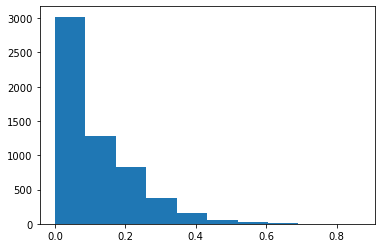

In [25]:
fig0, ax0 = plt.subplots()
ax0.hist(sentiments_df['pos'])
plt.show()

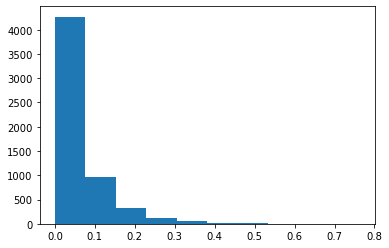

In [26]:
fig1, ax1 = plt.subplots()
ax1.hist(sentiments_df['neg'])
plt.show()

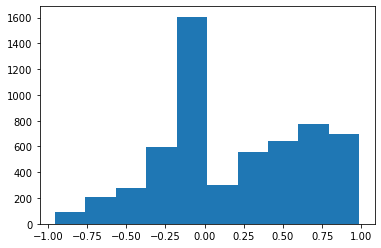

In [27]:
fig2, ax2 = plt.subplots()
ax2.hist(sentiments_df['compound'])
plt.show()

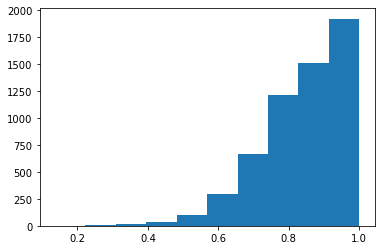

In [28]:
fig3, ax3 = plt.subplots()
ax3.hist(sentiments_df['neu'])
plt.show()